# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

### Step 1. Open the data file and study the general information. 

In [1]:
import pandas as pd
vehicles_us = pd.read_csv('/datasets/vehicles_us.csv')

In [2]:
vehicles_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Just looking at the data types and column names I think there are some mistakes regarding the data types for some columns( like model_year, date_posted, and maybe is_4wd because if it should be something that implies a condition a boolean type will have much sense.

In [3]:
vehicles_us.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


As a fist view of the data I see that there are some _NaN_ values, probably they should be there or these are just unknown values.So I should try to understand why this happend,if possible find a connection with other data from the table and fill in  with something that will help my analysis before starting to process the data. 

### Step 2. Data preprocessing

In [4]:
vehicles_us.isnull().sum()/len(vehicles_us)

price           0.000000
model_year      0.070238
model           0.000000
condition       0.000000
cylinders       0.102086
fuel            0.000000
odometer        0.153168
transmission    0.000000
type            0.000000
paint_color     0.179854
is_4wd          0.503697
date_posted     0.000000
days_listed     0.000000
dtype: float64

So we have missing values in the following  columns: _model_year_, _cylinders_,_odometer,paint_color_ and _is_4wd_.

In [5]:
vehicles_us['price'].value_counts()
vehicles_us['price'].mean()
medianPrice=vehicles_us['price'].median()
vehicles_us.loc[vehicles_us['price']<0,'price']= medianPrice

_price_ could never be lower than <b>0</b> so I think it is a misspeling and I decide to replace those values with the <b>median</b>.

In [6]:
vehicles_us['is_4wd'].isnull().sum()
vehicles_us['is_4wd'] = vehicles_us['is_4wd'].fillna(0)
vehicles_us['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

Since we have only <b>1</b> as value in the _is_4wd_ column and the missing values I assume that this is a <b>boolean condition</b>, so _NaN_ should be 0. I just replaced _NaN_ with <b>0</b> for a better view.   

In [7]:
quantitative_missing_values = ['cylinders','odometer','model_year']
vehicles_us.groupby(['transmission','type','model'])[quantitative_missing_values].median()

cylinders  odometer  model_year
transmission type  model                                             
automatic    SUV   acura tl                 6.0  127000.0      2007.0
                   bmw x5                   6.0  105621.0      2010.0
                   buick enclave            6.0  113728.0      2012.0
                   cadillac escalade        8.0  130000.0      2009.0
                   chevrolet cruze          4.0     158.0      2012.0
...                                         ...       ...         ...
other        wagon jeep wrangler            6.0   99915.0      2007.0
                   kia soul                 4.0  129015.0      2012.0
                   subaru forester          4.0   98074.0      2016.0
                   subaru impreza           4.0   35289.0      2018.0
                   subaru outback           5.0  111144.0      2014.0

[754 rows x 3 columns]

In [8]:
vehicles_us.groupby(['transmission','type','model'])[quantitative_missing_values].mean()


cylinders       odometer   model_year
transmission type  model                                                   
automatic    SUV   acura tl            6.000000  127000.000000  2007.000000
                   bmw x5              6.362832  109908.299020  2009.220721
                   buick enclave       6.000000  112850.467593  2012.238683
                   cadillac escalade   7.985663  124539.948000  2008.455197
                   chevrolet cruze     4.000000     158.000000  2012.000000
...                                         ...            ...          ...
other        wagon jeep wrangler       6.000000   90926.333333  2007.888889
                   kia soul            4.000000  123154.300000  2011.545455
                   subaru forester     4.000000   98074.000000  2016.000000
                   subaru impreza      4.000000   35289.000000  2018.000000
                   subaru outback      5.000000  111144.000000  2014.000000

[754 rows x 3 columns]

Since the mean and median are not so different and the median has more integer numbers I decide to <b>fill the missing values</b> with the <b>median<b/>.

In [9]:
medianModelYear = vehicles_us['model_year'].median()
medianCylinders = vehicles_us['cylinders'].median()
medianOdometer = vehicles_us['odometer'].median()

vehicles_us['model_year'] = vehicles_us['model_year'].fillna(medianModelYear)
vehicles_us['cylinders'] = vehicles_us['cylinders'].fillna(0)
vehicles_us['odometer'] = vehicles_us['odometer'].fillna(medianOdometer)
vehicles_us['odometer']=vehicles_us.loc[vehicles_us['odometer']==0.0]['odometer'] =medianOdometer


Now the missing values for _model_year_ and _odometer_ are filled with the median because I think that it won't affect my analysis and for the cylinders I just filled with 0 as I think this is the best approch since mean and median has no sense here and I couldn't find any connection with other columns. Now I don't have any missing values for the columns with quantitative values and I can start processing them.

In [10]:
vehicles_us.groupby('condition')['paint_color'].value_counts()
vehicles_us.groupby('fuel')['paint_color'].value_counts()
vehicles_us.groupby('type')['paint_color'].value_counts()

vehicles_us['paint_color'] = vehicles_us['paint_color'].fillna('undef')
vehicles_us.isnull().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

There is no dependency or relationship between _paint_color_ column and other columns and I can't fill the missing values with any specific color so I just replaced it with _undef_. So I also replaced the missing values for categorical values. No missing values for now on ! Next step is looking at the data type .

In [11]:
vehicles_us['model_year']=vehicles_us['model_year'].astype(int)
vehicles_us['cylinders']=vehicles_us['cylinders'].astype(int)
vehicles_us['is_4wd']=vehicles_us['is_4wd'].astype(bool)
vehicles_us['date_posted']=pd.to_datetime(vehicles_us['date_posted'], format='%Y-%m-%d')
vehicles_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null float64
model_year      51525 non-null int64
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null int64
fuel            51525 non-null object
odometer        51525 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     51525 non-null object
is_4wd          51525 non-null bool
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.8+ MB


I just thought that _model_year_ and _cylinders_ should always be integer numbers and I noticed that the _is_4wd_ column has those numbers for True or False conditions so I just changed the type to <b>boolean</b>.
Now everything is nice and clean. I don't have any float number for years , the date has also the right type, no missing values so everything is ready to be processed in order to find the right answers.

### Step 3. Make calculations and add them to the table

#### Day of the week, month, and year the ad was placed;
#### The vehicle's age (in years) when the ad was placed;
#### The vehicle's average mileage per year;

In [12]:
vehicles_us['dayOfWeek'] = pd.DatetimeIndex(vehicles_us['date_posted']).dayofweek
vehicles_us['Month'] = pd.DatetimeIndex(vehicles_us['date_posted']).month
vehicles_us['Year'] = pd.DatetimeIndex(vehicles_us['date_posted']).year
vehicles_us['VehicleAge'] = vehicles_us['Year']-vehicles_us['model_year']
vehicles_us['AverageMileage'] = vehicles_us['odometer']/vehicles_us[vehicles_us['VehicleAge']>0]['VehicleAge']
vehicles_us.loc[vehicles_us['VehicleAge']==0,'AverageMileage']= vehicles_us['odometer']
vehicles_us.query('VehicleAge==0')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dayOfWeek,Month,Year,VehicleAge,AverageMileage
19,13990.0,2018,hyundai elantra,excellent,4,gas,113000.0,automatic,sedan,red,False,2018-08-25,27,5,8,2018,0,113000.0
71,23300.0,2018,nissan frontier crew cab sv,good,6,gas,113000.0,other,pickup,undef,True,2018-10-13,36,5,10,2018,0,113000.0
78,23800.0,2019,nissan frontier crew cab sv,good,6,gas,113000.0,other,pickup,silver,True,2019-02-28,30,3,2,2019,0,113000.0
99,39950.0,2018,chevrolet silverado,excellent,8,gas,113000.0,automatic,truck,undef,True,2018-08-05,16,6,8,2018,0,113000.0
106,21500.0,2019,nissan frontier crew cab sv,good,6,gas,113000.0,other,pickup,white,False,2019-03-29,70,4,3,2019,0,113000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51376,27890.0,2018,ram 1500,excellent,8,gas,113000.0,automatic,truck,undef,True,2018-05-06,39,6,5,2018,0,113000.0
51442,28990.0,2018,ford f150,excellent,0,gas,113000.0,automatic,truck,white,True,2018-06-13,47,2,6,2018,0,113000.0
51446,15999.0,2018,chevrolet malibu,excellent,4,gas,113000.0,automatic,sedan,black,False,2018-07-28,8,5,7,2018,0,113000.0
51447,33990.0,2019,ram 1500,excellent,8,gas,113000.0,automatic,truck,white,True,2019-01-25,36,4,1,2019,0,113000.0


#### In the condition column, replace string values with a numeric scale:
new = 5;
like new = 4;
excellent = 3;
good = 2;
fair = 1;
salvage = 0.

In [13]:
def to_numeric_condition(row):
    condition_value = row['condition']
    if condition_value == 'new':
        return 5
    if condition_value == 'like new':
        return 4
    if condition_value == 'excellent':
        return 3
    if condition_value == 'good':
        return 2
    if condition_value == 'fair':
        return 1
    if condition_value == 'salvage':
        return 0

vehicles_us['condition'] = vehicles_us.apply(to_numeric_condition, axis=1)
vehicles_us.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dayOfWeek,Month,Year,VehicleAge,AverageMileage
0,9400.0,2011,bmw x5,2,6,gas,113000.0,automatic,SUV,undef,True,2018-06-23,19,5,6,2018,7,16142.857143
1,25500.0,2011,ford f-150,2,6,gas,113000.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018,7,16142.857143
2,5500.0,2013,hyundai sonata,4,4,gas,113000.0,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6,18833.333333
3,1500.0,2003,ford f-150,1,8,gas,113000.0,automatic,pickup,undef,False,2019-03-22,9,4,3,2019,16,7062.500000
4,14900.0,2017,chrysler 200,3,4,gas,113000.0,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2,56500.000000


We extract some more informations from data, we have a better view and understanding and we can make better hypothesis.Even though we had all the informations before, the way they are showed now, in the new columns, helps us use this data more easily and efficiently.

### Step 4. Carry out exploratory data analysis

#### Study the following parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition. Plot histograms for each of these parameters. Study how outliers affect the form and readability of the histograms.

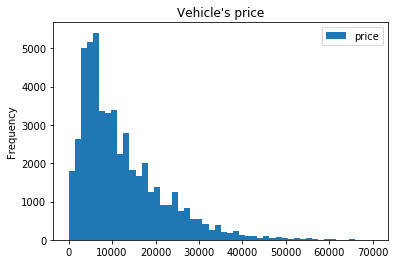

In [14]:
import matplotlib.pyplot as plt
vehicles_us.plot(y='price',title="Vehicle's price",kind='hist',bins=50, range=(0,70000));

There are some vehicles with the price zero which it could be considered outlier, then we see that the average price for a vehicle is between 3000 and 5000 and than the more expensive a vehicles is the less the amount. From 40000 to 70000 we see that there are few to no cars. 

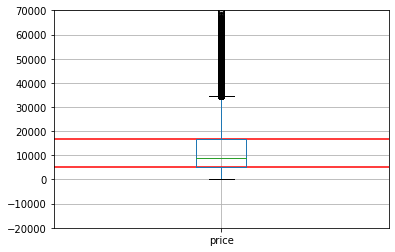

In [15]:
Q1 = vehicles_us['price'].quantile(0.25)
Q3 = vehicles_us['price'].quantile(0.75)
IQR = Q3 - Q1
plt.ylim(-20000, 70000)
vehicles_us.boxplot('price')
plt.hlines(y=[Q1, Q3], xmin=0.5, xmax=1.5, color='red') ;

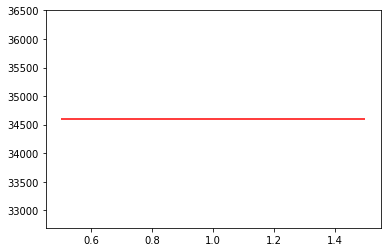

In [16]:
plt.hlines(y=Q3+1.5*IQR, xmin=0.5, xmax=1.5, color='red'); 

So the median is almost 10000, the quntiles are 5000 and 7000 and as I expected the outliers are the vehicles with the price more than 34500.

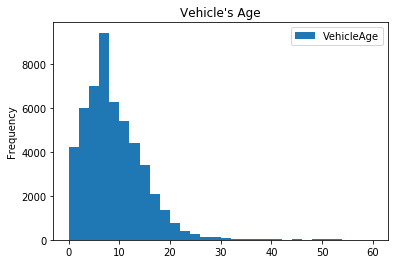

In [17]:
vehicles_us.plot(title="Vehicle's Age",y='VehicleAge',kind='hist', bins=30, range=(0,60));

There are a lot of zero values but this should be interpreted as the current year, we have a pick for vehicles between 5 and 10 years and very few vehicles older than 30 years.

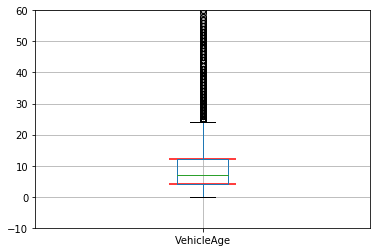

In [18]:
Q1 = vehicles_us['VehicleAge'].quantile(0.25)
Q3 = vehicles_us['VehicleAge'].quantile(0.75)
IQR = Q3 - Q1
plt.ylim(-10, 60)
vehicles_us.boxplot('VehicleAge')
plt.hlines(y=[Q1, Q3], xmin=0.9, xmax=1.1, color='red'); 

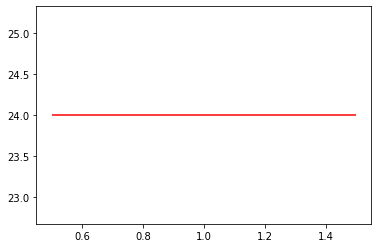

In [19]:
plt.hlines(y=Q3+1.5*IQR, xmin=0.5, xmax=1.5, color='red') ;

So the most popular cars are those aged between 5 and 12. The outliers are noticed for cars older than 24.

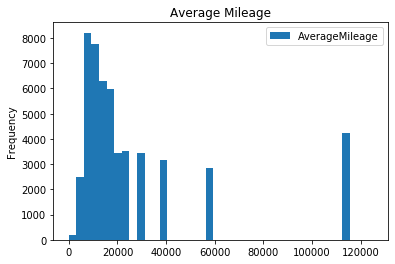

In [20]:
vehicles_us.plot(title='Average Mileage',y='AverageMileage',kind='hist',bins=40, range=(-100,125000));

It's clear to see that values above 25000 are outliers and most of the cars have the mileage between 5000 and 15000.

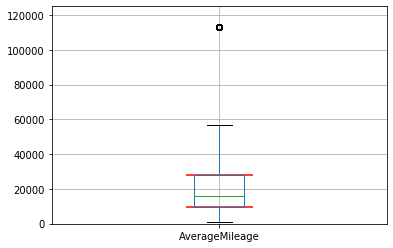

In [21]:
Q1 = vehicles_us['AverageMileage'].quantile(0.25)
Q3 = vehicles_us['AverageMileage'].quantile(0.75)
IQR = Q3 - Q1
plt.ylim(-100,125000)
vehicles_us.boxplot('AverageMileage')
plt.hlines(y=[Q1, Q3], xmin=0.9, xmax=1.1, color='red') ;

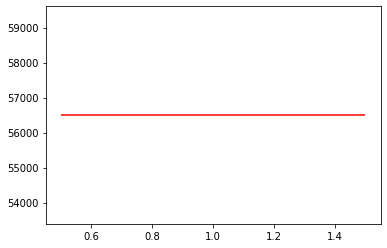

In [22]:
plt.hlines(y=Q3+1.5*IQR, xmin=0.5, xmax=1.5, color='red') ;

The value for the lower outlier is not much higher than 0 which is understandable but the upper outlier is way higher from the rest of the values and maybe that's the mileage for the newer cars, with less than one year.

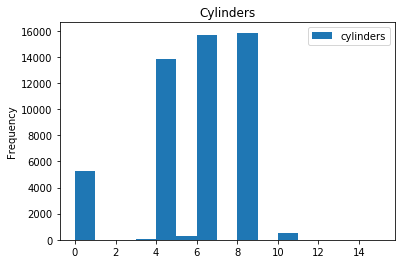

In [23]:
vehicles_us.plot(title='Cylinders',y='cylinders',kind='hist',bins=15, range=(0,15));

Most of the vehicles have between 4 and 10 cylinders and just a few of them have 3,5 and  more than 10. 0 values are the cars with unknown values for cylinders. 

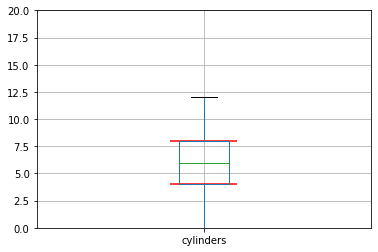

In [24]:
Q1 = vehicles_us['cylinders'].quantile(0.25)
Q3 = vehicles_us['cylinders'].quantile(0.75)
IQR = Q3 - Q1
plt.ylim(0,20)
vehicles_us.boxplot('cylinders')
plt.hlines(y=[Q1, Q3], xmin=0.9, xmax=1.1, color='red') ;

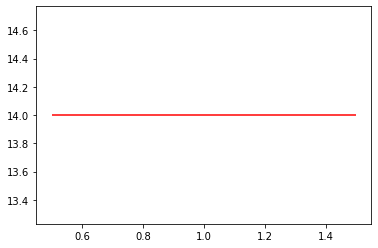

In [25]:
plt.hlines(y=Q3+1.5*IQR, xmin=0.5, xmax=1.5, color='red'); 

Even though we see that outliers are founded for vehicles with more than 14 cylinders, there are a few so not noticeble in our graph. 

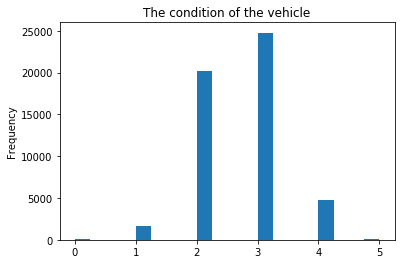

In [26]:
vehicles_us['condition'].plot(title='The condition of the vehicle',y='condition',kind='hist',bins=20);

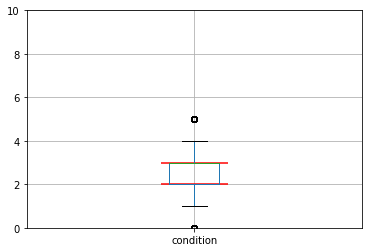

In [27]:
Q1 = vehicles_us['condition'].quantile(0.25)
Q3 = vehicles_us['condition'].quantile(0.75)
IQR = Q3 - Q1
plt.ylim(0,10)
vehicles_us.boxplot('condition')
plt.hlines(y=[Q1, Q3], xmin=0.9, xmax=1.1, color='red');

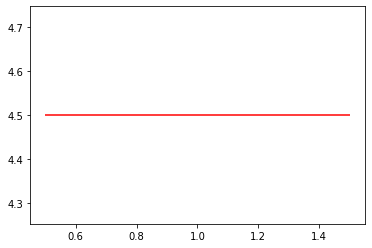

In [28]:
plt.hlines(y=Q3+1.5*IQR, xmin=0.5, xmax=1.5, color='red') ;

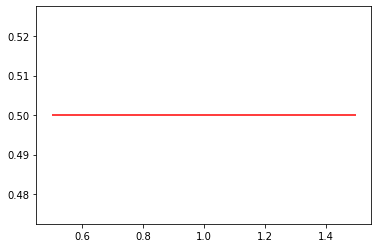

In [29]:
plt.hlines(y=Q1-1.5*IQR, xmin=0.5, xmax=1.5, color='red') ;

These graphs show a clear evidence. Almost all of the cars have excellent or good condition.

In [30]:
vehicles_us.describe()

,price,model_year,condition,cylinders,odometer,days_listed,dayOfWeek,Month,Year,VehicleAge,AverageMileage
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.0,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.838234,2.637535,5.499932,113000.0,39.55476,3.005434,6.628491,2018.307462,8.469229,25923.773749
std,10040.803015,6.065836,0.712447,2.431985,0.0,28.20427,1.997759,3.474134,0.461447,6.079773,28763.171852
min,1.000000,1908.000000,0.000000,0.000000,113000.0,0.00000,0.000000,1.000000,2018.000000,0.000000,1027.272727
25%,5000.000000,2007.000000,2.000000,4.000000,113000.0,19.00000,1.000000,3.000000,2018.000000,4.000000,9416.666667
50%,9000.000000,2011.000000,3.000000,6.000000,113000.0,33.00000,3.000000,7.000000,2018.000000,7.000000,16142.857143
75%,16839.000000,2014.000000,3.000000,8.000000,113000.0,53.00000,5.000000,10.000000,2019.000000,12.000000,28250.000000
max,375000.000000,2019.000000,5.000000,12.000000,113000.0,271.00000,6.000000,12.000000,2019.000000,110.000000,113000.000000


#### Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data.

In [31]:
NoOutliers_vehicle = vehicles_us.query('price<35000 & VehicleAge<24 & AverageMileage<40000 & cylinders<10 & cylinders>0 & condition<4.5 & condition>1')
NoOutliers_vehicle  

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dayOfWeek,Month,Year,VehicleAge,AverageMileage
0,9400.0,2011,bmw x5,2,6,gas,113000.0,automatic,SUV,undef,True,2018-06-23,19,5,6,2018,7,16142.857143
1,25500.0,2011,ford f-150,2,6,gas,113000.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018,7,16142.857143
2,5500.0,2013,hyundai sonata,4,4,gas,113000.0,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6,18833.333333
5,14990.0,2014,chrysler 300,3,6,gas,113000.0,automatic,sedan,black,True,2018-06-20,15,2,6,2018,4,28250.000000
6,12990.0,2015,toyota camry,3,4,gas,113000.0,automatic,sedan,white,False,2018-12-27,73,3,12,2018,3,37666.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51519,11750.0,2015,honda accord,3,4,gas,113000.0,automatic,coupe,undef,False,2018-11-24,89,5,11,2018,3,37666.666667
51520,9249.0,2013,nissan maxima,4,6,gas,113000.0,automatic,sedan,black,False,2018-10-03,37,2,10,2018,5,22600.000000
51522,3950.0,2009,hyundai sonata,3,4,gas,113000.0,automatic,sedan,blue,False,2018-11-15,32,3,11,2018,9,12555.555556
51523,7455.0,2013,toyota corolla,2,4,gas,113000.0,automatic,sedan,black,False,2018-07-02,71,0,7,2018,5,22600.000000


Based on the previous analysis I determinated the outliers and store the data without them in the variable called _NoOultiers_vehicle_.

#### Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram.

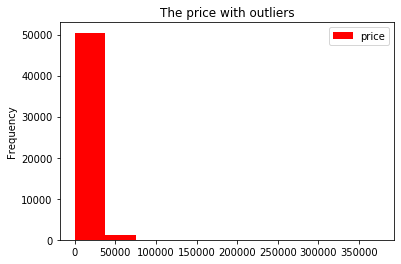

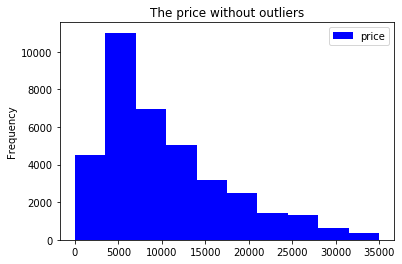

In [32]:
vehicles_us.plot(title='The price with outliers',y='price',kind='hist',color='red');
NoOutliers_vehicle.plot(title='The price without outliers',y='price',kind='hist',color='blue');

Seems like there were a lot of outliners but at least I can see a peak.

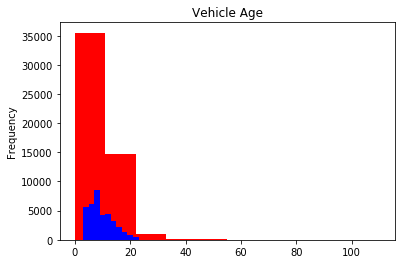

In [33]:
vehicles_us['VehicleAge'].plot(title='Vehicle Age',kind='hist',color='red');
NoOutliers_vehicle['VehicleAge'].plot(title='Vehicle Age',kind='hist',color='blue');

No outliers makes the graph look more compact,so now we can see a peak for the vehicle's age which is less than 10 years. 

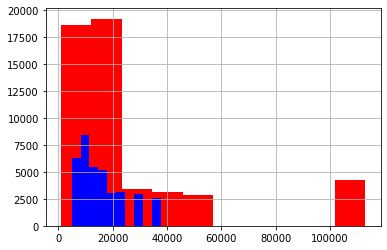

In [34]:
vehicles_us['AverageMileage'].hist(color='red');
NoOutliers_vehicle['AverageMileage'].hist(color='blue');

The data with values greater than 100000 for _AverageMileage_ column was definetly an outlier we should get rid off.

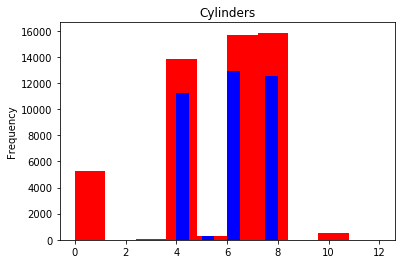

In [35]:
vehicles_us['cylinders'].plot(title='Cylinders',kind='hist',color='red');
NoOutliers_vehicle['cylinders'].plot(title='Cylinders',kind='hist',color='blue');

Now we got rid of 0 values and the data looks much better.

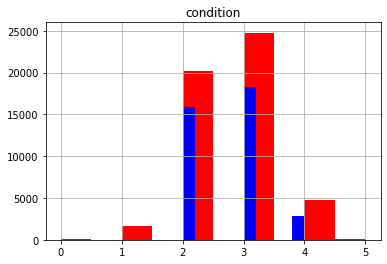

In [36]:
vehicles_us.hist('condition',color='red');
NoOutliers_vehicle['condition'].hist(color='blue');

In [37]:
NoOutliers_vehicle.describe()

,price,model_year,condition,cylinders,odometer,days_listed,dayOfWeek,Month,Year,VehicleAge,AverageMileage
count,36951.000000,36951.000000,36951.000000,36951.000000,36951.0,36951.000000,36951.000000,36951.000000,36951.000000,36951.000000,36951.000000
mean,10526.069470,2009.278937,2.647506,6.064843,113000.0,39.643609,2.994344,6.557360,2018.318719,9.039782,16051.268221
std,7124.004843,4.401009,0.618387,1.606909,0.0,28.250597,1.997277,3.486406,0.465986,4.398817,8506.600022
min,1.000000,1995.000000,2.000000,3.000000,113000.0,0.000000,0.000000,1.000000,2018.000000,3.000000,4913.043478
25%,4999.000000,2006.000000,2.000000,4.000000,113000.0,19.000000,1.000000,3.000000,2018.000000,6.000000,9416.666667
50%,8499.000000,2011.000000,3.000000,6.000000,113000.0,33.000000,3.000000,7.000000,2018.000000,8.000000,14125.000000
75%,14500.000000,2013.000000,3.000000,8.000000,113000.0,53.000000,5.000000,10.000000,2019.000000,12.000000,18833.333333
max,34999.000000,2016.000000,4.000000,8.000000,113000.0,271.000000,6.000000,12.000000,2019.000000,23.000000,37666.666667


#### Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.

In [38]:
vehicles_us['days_listed'].value_counts()

18     959
24     950
22     945
19     941
20     934
      ... 
263      1
182      1
261      1
217      1
223      1
Name: days_listed, Length: 227, dtype: int64

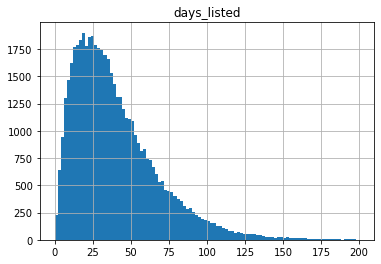

In [39]:
vehicles_us.hist('days_listed',bins=100, range=(0,200));

So the grapf above shows that the ad lifetime is usually between <b>10</b> and <b>30</b> days .

In [40]:
vehicles_us['days_listed'].mean()

39.55475982532751

In [41]:
vehicles_us['days_listed'].median()

33.0

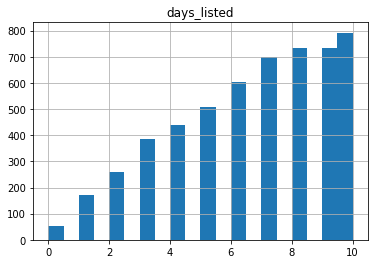

In [42]:
vehicles_us.hist('days_listed',bins=20, range=(0,10));

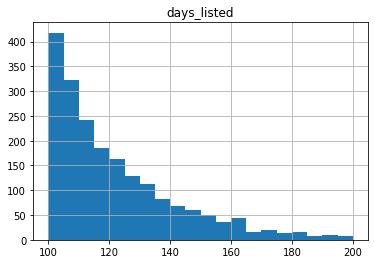

In [43]:
vehicles_us.hist('days_listed',bins=20, range=(100,200));

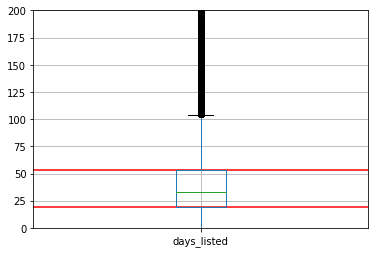

In [44]:
Q1 = vehicles_us['days_listed'].quantile(0.25)
Q3 = vehicles_us['days_listed'].quantile(0.75)
IQR = Q3 - Q1
plt.ylim(0, 200)
vehicles_us.boxplot('days_listed')
plt.hlines(y=[Q1, Q3], xmin=0.5, xmax=1.5, color='red');

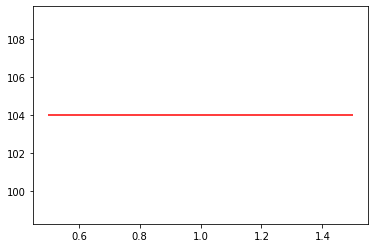

In [45]:
plt.hlines(y=Q3+1.5*IQR, xmin=0.5, xmax=1.5, color='red') ;
vehicles_us['quick_remove']=vehicles_us['days_listed']<10
vehicles_us['long_time']=vehicles_us['days_listed']>100

<b>Less</b> than <b>10 days</b> should be considered a quick remove of an ad and more that <b>100</b> days could be associated with an abnormal long period of time. 

#### Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.

In [46]:
new_data=NoOutliers_vehicle.pivot_table(index='model', values='days_listed',aggfunc='sum')
new_data.sort_values('days_listed',ascending=False).head(20)

,days_listed
model,
ford f-150,78934
chevrolet silverado 1500,60931
ram 1500,48777
chevrolet silverado,35546
jeep wrangler,32517
toyota camry,30978
honda accord,29729
ram 2500,28749
gmc sierra 1500,27936


In [47]:
new_data=NoOutliers_vehicle.pivot_table(index='model', values='price')
new_data.sort_values('price').tail(20)

,price
model,
gmc sierra 1500,14447.091581
ford f350 super duty,14633.529412
jeep wrangler,14704.907767
ford f250,15043.136364
chevrolet silverado 2500hd,16356.047619
ford f350,17704.910256
chevrolet corvette,17836.047619
gmc sierra 2500hd,17853.785942
ram 2500,18153.897759


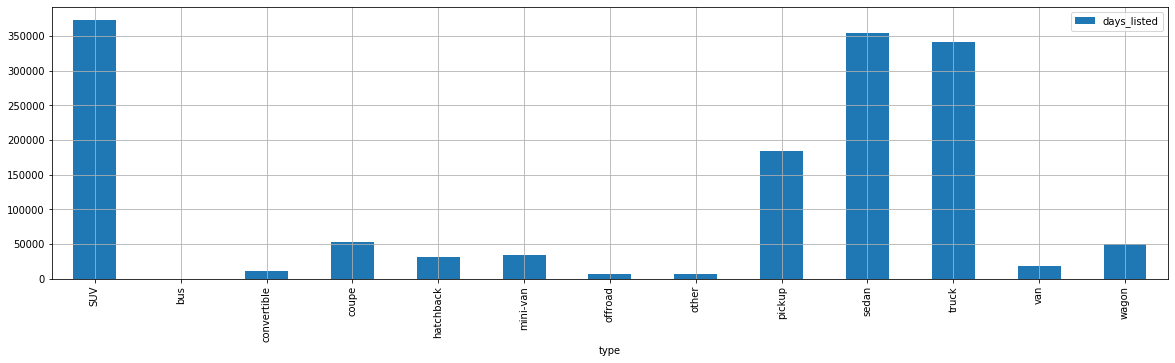

In [48]:
NoOutliers_vehicle.pivot_table(index='type', values='days_listed', aggfunc='sum').plot(kind='bar',grid=True, figsize=(20,5));

The two types with the greatest number of ads are <b>SUV</b> and <b>sedan</b>.

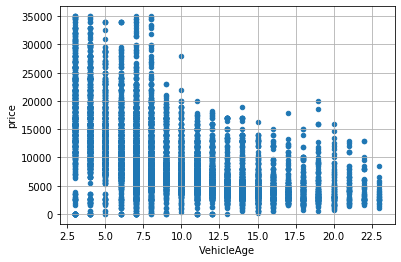

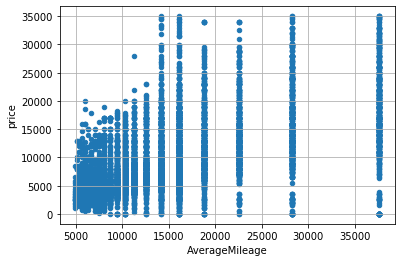

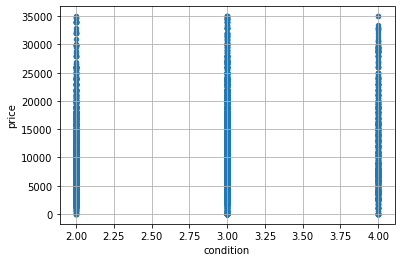

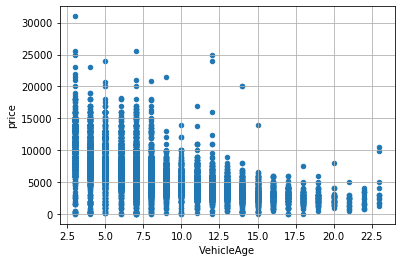

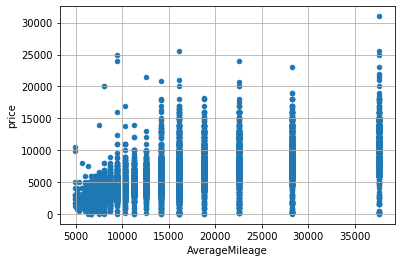

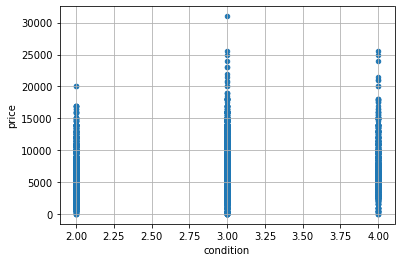

In [49]:
group_data=NoOutliers_vehicle.query('type=="SUV"')
group_data.plot(x='VehicleAge',y='price',kind='scatter', grid = True);
group_data.plot(x='AverageMileage',y='price',kind='scatter', grid = True);
group_data.plot(x='condition',y='price',kind='scatter', grid = True);

group_data2=NoOutliers_vehicle.query('type=="sedan"')
group_data2.plot(x='VehicleAge',y='price',kind='scatter', grid = True);
group_data2.plot(x='AverageMileage',y='price',kind='scatter', grid = True);
group_data2.plot(x='condition',y='price',kind='scatter', grid = True);


In [50]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

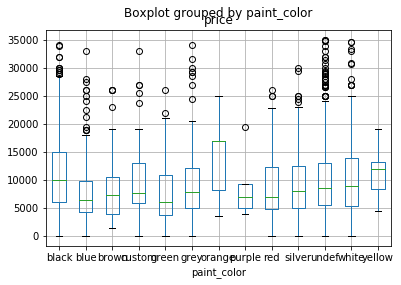

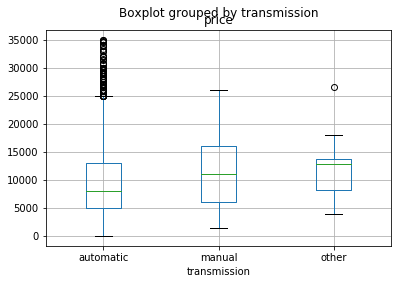

In [51]:
group_data_new=group_data.query('days_listed>50');
group_data_new.boxplot(column='price', by='paint_color');
group_data_new.boxplot(column='price', by='transmission');
  

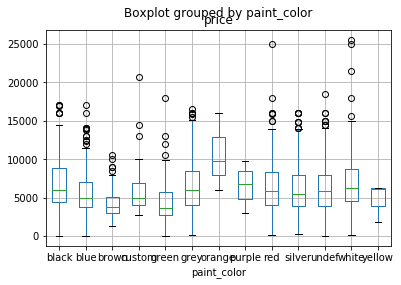

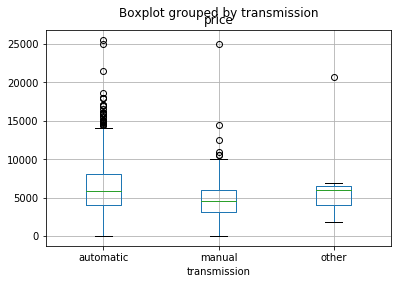

In [52]:
group_data2_new=group_data2.query('days_listed>50')
group_data2_new.boxplot(column='price', by='paint_color');
group_data2_new.boxplot(column='price', by='transmission');

Based on the graphs for these specific types I can say that the price for vehicles <b>older than 10 years</b> is <b>less than 20000</b> and the <b>newer ones</b> can reach up to <b>35000</b>.

The mileage has also an influence on the price because I can see that most of the vehicles have the mileage between <b>5000</b> and <b>10000</b> and the price for these vehicles usually is <b>not higher than 15000</b>.

Regarding the condition, the vehicle types with the greatest number of ads have : <b> like new, excellent or good condition</b> and the price differences for each category are not that high.

For the color, I can only notice that <b>orange</b> vehicles cost a little more than the rest of the vehicles.

As I have the _other_ category for _transmission_ column and looking at these graphs I can't say that the transmission has also an influence on the price because it depends a lot on the unknown values.

For determinating which factors influence the price more I looked at the data and fiiled the missing values for having more valid data to analyse and for better hypothesis.The following missing values were founded :model_year, cylinders,odometer,paint_color and is_4wd.
Then I changed the data type for columns that had an ambiguos or not so precise type. 
When I started preprocessing the data I added some new columns to have more detailed and specific data to compare with. 
After having all data ready, I started using different graphs for the columns and than associating them with the price.
This helped me see which data is is an outlier and can be savetly removed and which one should be used for a better precision.
As a conclusion, going through all these steps I can say that the price of a vehicle is not depending much on the color of the car or transmission but the vehicle's age, mileage and condition are definitely factors that influence the price of a vehicle. A vehicle newer than 10 years in good condition will definitely cost more than an older one. 